In [196]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [197]:
df = pd.read_csv('../Data/Alcohol_Sales.csv',index_col=0,parse_dates=True)
df.index.freq = 'MS'

In [198]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [221]:
df.dtypes

Sales    int64
dtype: object

In [218]:
dfn= pd.read_csv('../Data/Alcohol_Sales.csv')

In [219]:
dfn.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [220]:
dfn.dtypes

DATE              object
S4248SM144NCEN     int64
dtype: object

In [199]:
df.columns = ['Sales']

Checking for any missing values

In [27]:
df.isnull().sum()

Sales    0
dtype: int64

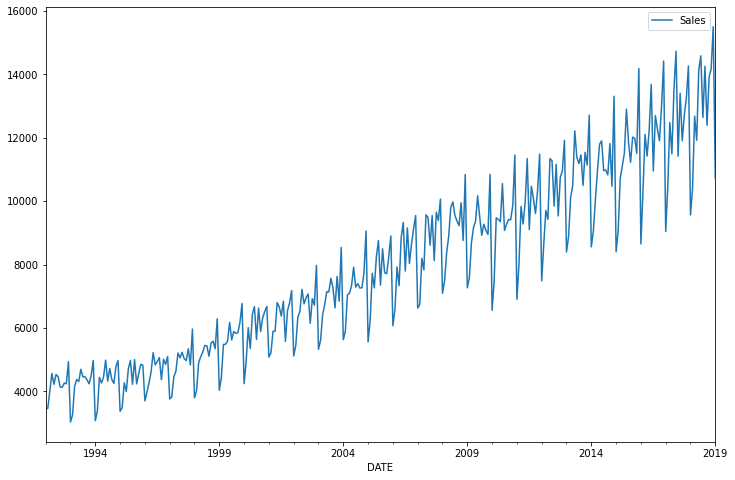

In [28]:
df.plot(figsize=(12,8));

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

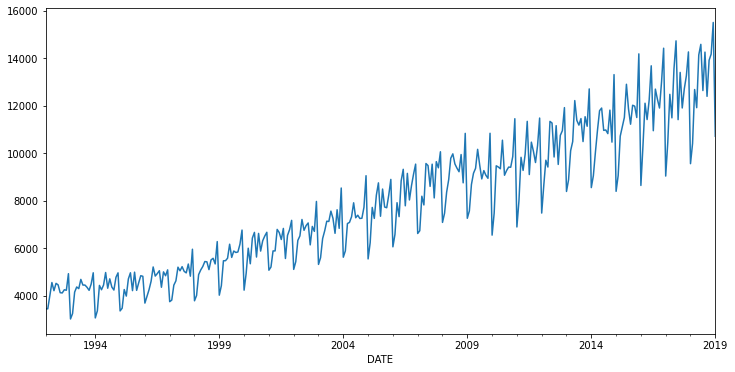

In [30]:
results = seasonal_decompose(df['Sales'])
results.observed.plot(figsize=(12,6));

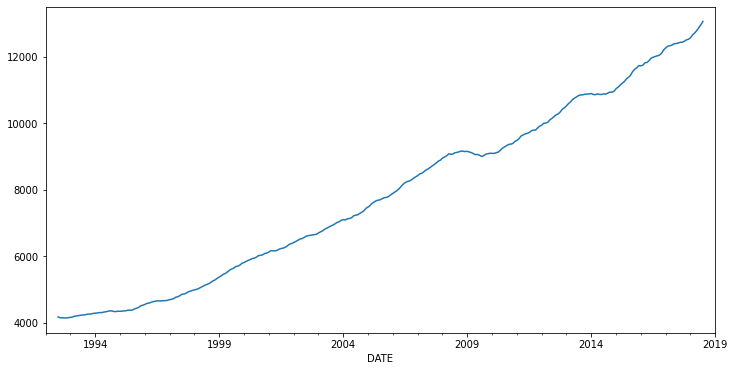

In [31]:
results.trend.plot(figsize=(12,6));

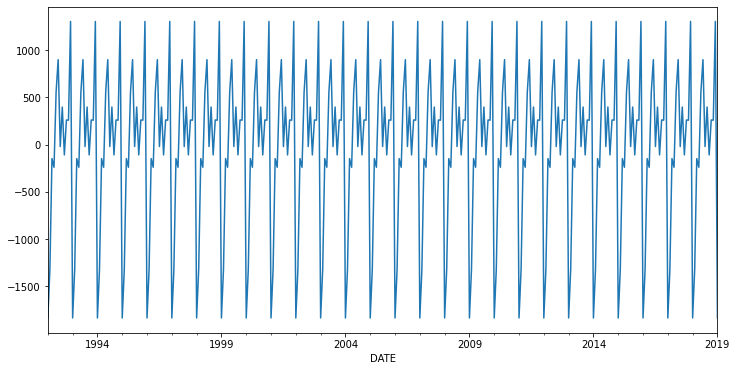

In [32]:
results.seasonal.plot(figsize=(12,6));

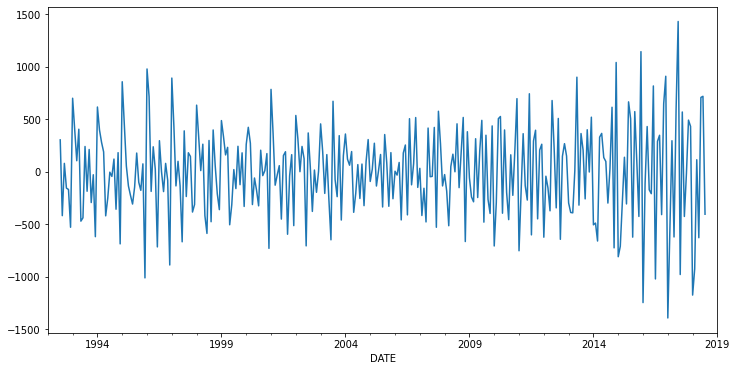

In [33]:
results.resid.plot(figsize=(12,6));

### Checking for Stationarity

In [ ]:
#Augmented Dickey-Fuller Test

In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
print('Augmented Dickey-Fuller Test on Data')
dftest = adfuller(df['Sales'],autolag='AIC')
dftest

Augmented Dickey-Fuller Test on Data


(2.0374047259137,
 0.9987196267088919,
 14,
 310,
 {'1%': -3.451621854687657,
  '5%': -2.870908950689806,
  '10%': -2.571761810613944},
 4458.6002223980295)

In [15]:
out = pd.Series(dftest[0:4], index = ['ADF test statistic','p-value','# lags used','# observations'])


In [29]:
for key,val in dftest[4].items():
    out[f'Critical value ({key})'] = val

print(out)   
if out[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")     

ADF test statistic       2.0374
p-value                 0.99872
# lags used                  14
# observations              310
Critical value (1)            %
Critical value (5)            %
Critical value (1%)    -3.45162
Critical value (5%)    -2.87091
Critical value (10%)   -2.57176
dtype: object
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


## Train Test split

In [200]:
len(df)

325

In [201]:
325-12

313

In [202]:
train = df.iloc[:313]
test = df.iloc[313:]

In [203]:
len(test)

12

## Scale Data

In [204]:
from sklearn.preprocessing import MinMaxScaler

In [205]:
scaler = MinMaxScaler()

In [206]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [207]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

In [208]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [209]:
#Define generator

n_input = 12  # Using last 12 months data to predict the next month
n_features=1  # One timestamp depicting one feature

generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size = 1) # batch_size=n-->'n' batch of size(=input(here 12)) at a time to give 'n' output

In [210]:
len(scaled_train)

313

In [211]:
len(generator)  #n_input = 12

301

In [212]:
scaled_train

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ],
       [0.12804513],
       [0.12266006],
       [0.09453799],
       [0.09359774],
       [0.10496624],
       [0.10334217],
       [0.16283443],
       [0.        ],
       [0.0196598 ],
       [0.09650397],
       [0.11505257],
       [0.10906915],
       [0.14231986],
       [0.12197624],
       [0.12189076],
       [0.11394136],
       [0.10300026],
       [0.12556629],
       [0.16608257],
       [0.00376101],
       [0.02957518],
       [0.12069408],
       [0.10513719],
       [0.12214719],
       [0.16702282],
       [0.11052227],
       [0.14428584],
       [0.11479614],
       [0.10402599],
       [0.14984187],
       [0.16582614],
       [0.02897684],
       [0.03872126],
       [0.10582101],
       [0.08231473],
       [0.14394393],
       [0.16608257],
       [0.10188905],
       [0.16830498],
       [0.10291478],
       [0.13018207],
       [0.15556885],
       [0.153

In [213]:
#First batch
generator[0]  # 3-D output

(array([[[0.03658432],
         [0.03649885],
         [0.08299855],
         [0.13103684],
         [0.1017181 ],
         [0.12804513],
         [0.12266006],
         [0.09453799],
         [0.09359774],
         [0.10496624],
         [0.10334217],
         [0.16283443]]]), array([[0.]]))

In [214]:
X,y = generator[0]

In [215]:
print('Given this array:\n{}'.format(X.flatten()))
print('Predict this y:\n{}'.format(y))

Given this array:
[0.03658432 0.03649885 0.08299855 0.13103684 0.1017181  0.12804513
 0.12266006 0.09453799 0.09359774 0.10496624 0.10334217 0.16283443]
Predict this y:
[[0.]]


## Create the model

In [99]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM




In [216]:
# Define model
model = Sequential()
#model.add(LSTM(100,activation='relu', input_shape=(n_input, n_features), return_sequences=True))
#By default LSTM only returns it's final output after the last element of a sequence. If we want to chain two together then we need to pass the output after each element of the sequence from the first LSTM to the second#
model.add(LSTM(150,activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')


In [172]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [217]:
#Fit model
model.fit_generator(generator,epochs=50)

Epoch 1/50
301/301 [==============================] - 3s 10ms/step - loss: 0.0151
Epoch 2/50
301/301 [==============================] - 2s 8ms/step - loss: 0.0088
Epoch 3/50
301/301 [==============================] - 3s 9ms/step - loss: 0.0101
Epoch 4/50
301/301 [==============================] - 3s 8ms/step - loss: 0.0084
Epoch 5/50
301/301 [==============================] - 3s 10ms/step - loss: 0.0084
Epoch 6/50
301/301 [==============================] - 3s 9ms/step - loss: 0.0073
Epoch 7/50
301/301 [==============================] - 3s 9ms/step - loss: 0.0059
Epoch 8/50
301/301 [==============================] - 2s 8ms/step - loss: 0.0052
Epoch 9/50
301/301 [==============================] - 3s 8ms/step - loss: 0.0040
Epoch 10/50
301/301 [==============================] - 3s 8ms/step - loss: 0.0031
Epoch 11/50
301/301 [==============================] - 3s 10ms/step - loss: 0.0026
Epoch 12/50
301/301 [==============================] - 3s 9ms/step - loss: 0.0025
Epoch 13/50
301/301 [=

In [174]:
model.history.history.keys()

dict_keys(['loss'])

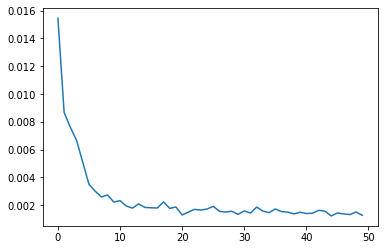

In [175]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## Evaluate on Test Data

In [105]:
# Using 12 history steps ---> step 13
# Last 12 points train ---> pt 1 of test data

In [176]:
first_eval_batch = scaled_train[-12:]


In [177]:
first_eval_batch

array([[0.63432772],
       [0.80776135],
       [0.72313873],
       [0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ]])

In [178]:
# As model expects 3-D data 
first_eval_batch = first_eval_batch.reshape((1,n_input,n_features))

In [179]:
first_eval_batch.shape

(1, 12, 1)

In [180]:
model.predict(first_eval_batch)

array([[0.7114008]], dtype=float32)

In [181]:
#Predicting for whole test range
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1,n_input,n_features))

for i in range(len(test)):
    #([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0] 

    # Store prediction
    test_predictions.append(current_pred)
    
    # Update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [182]:
test_predictions

[array([0.7114008], dtype=float32),
 array([0.8217084], dtype=float32),
 array([0.7882882], dtype=float32),
 array([0.9424048], dtype=float32),
 array([1.0389149], dtype=float32),
 array([0.76617926], dtype=float32),
 array([0.934264], dtype=float32),
 array([0.7829645], dtype=float32),
 array([0.88157016], dtype=float32),
 array([0.9033563], dtype=float32),
 array([1.0054843], dtype=float32),
 array([0.60121155], dtype=float32)]

In [183]:
scaled_test

array([[0.63116506],
       [0.82502778],
       [0.75972305],
       [0.94939738],
       [0.98743482],
       [0.82135225],
       [0.95956919],
       [0.80049577],
       [0.93025045],
       [0.95247457],
       [1.0661595 ],
       [0.65706471]])

## Inverse Transformations and Compare

In [184]:
true_predictions = scaler.inverse_transform(test_predictions)

In [185]:
true_predictions

array([[11353.67803997],
       [12644.16635138],
       [12253.18337172],
       [14056.19383258],
       [15185.26563621],
       [11994.53120476],
       [13960.95458549],
       [12190.90200847],
       [13344.48930639],
       [13599.36551404],
       [14794.16132379],
       [10064.57389832]])

In [186]:
test

,Sales,Predictions
DATE,,
2018-02-01,10415,11619.646433
2018-03-01,12683,12740.895760
2018-04-01,11919,12523.678732
2018-05-01,14138,14405.042964
2018-06-01,14583,15166.262415
2018-07-01,12640,12328.950105
2018-08-01,14257,13973.609453
2018-09-01,12396,12517.190219
2018-10-01,13914,13569.195495


In [187]:
test['Predictions'] = true_predictions

<AxesSubplot:xlabel='DATE'>

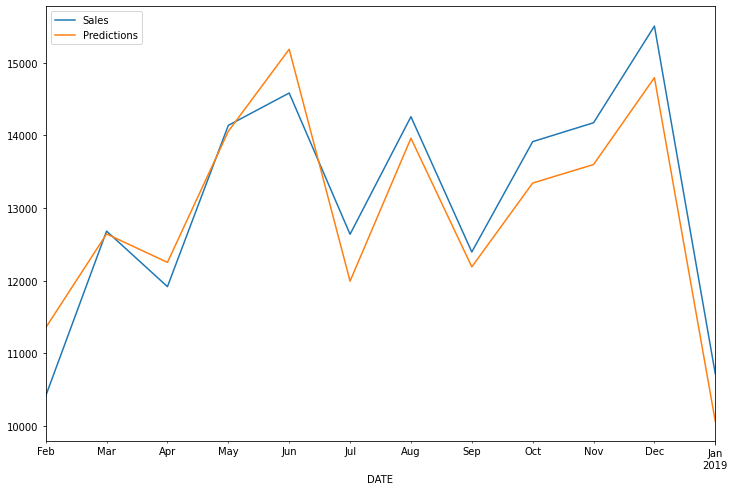

In [188]:
test.plot(figsize=(12,8))

## Analyzing Model Performance

In [189]:
from sklearn.metrics import mean_squared_error

In [190]:
mean_squared_error(test['Predictions'],test['Sales'])

291286.7554093497

In [191]:
np.sqrt(mean_squared_error(test['Predictions'],test['Sales']))

539.7098807779506

In [192]:
test['Sales'].std()

1577.3403463367754

In [193]:
MAPE = np.mean((abs(test['Sales']-test['Predictions'])/test['Sales'])*100)

In [194]:
MAPE

3.7075866480167705

## Predicting into future

In [76]:

future_predictions = []
future = 12
eval_batch = scaled_test[-n_input:]
current_batch = eval_batch.reshape((1,n_input,n_features))

for i in range(future):
    #([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0] 

    # Store prediction
    future_predictions.append(current_pred)
    
    # Update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [77]:
future_predictions

[array([0.74532646], dtype=float32),
 array([0.863636], dtype=float32),
 array([0.86154556], dtype=float32),
 array([1.0136375], dtype=float32),
 array([1.0288799], dtype=float32),
 array([0.90362656], dtype=float32),
 array([1.0152318], dtype=float32),
 array([0.8733937], dtype=float32),
 array([1.0023544], dtype=float32),
 array([1.0188453], dtype=float32),
 array([1.1225723], dtype=float32),
 array([0.7054541], dtype=float32)]

In [78]:
future_pred = scaler.inverse_transform(future_predictions)

In [79]:
test[['Sales']]

,Sales
DATE,
2018-02-01,10415
2018-03-01,12683
2018-04-01,11919
2018-05-01,14138
2018-06-01,14583
2018-07-01,12640
2018-08-01,14257
2018-09-01,12396
2018-10-01,13914


In [80]:
# Indexing for future prediction--> starting from where the test set ended 
idx = pd.date_range('2019-02-01', periods=12, freq='MS')
idx

DatetimeIndex(['2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
               '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',
               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [81]:
Future = pd.DataFrame(future_pred,columns=['Sales'],index=idx)

In [82]:
Future

,Sales
2019-02-01,11750.574249
2019-03-01,13134.677761
2019-04-01,13110.221539
2019-05-01,14889.545612
2019-06-01,15067.865727
2019-07-01,13602.527139
2019-08-01,14908.197387
2019-09-01,13248.833065
2019-10-01,14757.543932
2019-11-01,14950.471396


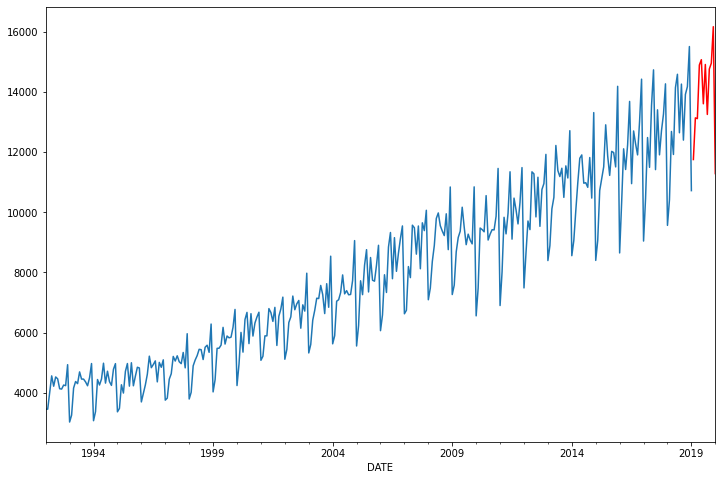

In [83]:
#test['Sales'].plot(figsize=(12,8))
df['Sales'].plot(figsize=(12,8))
Future['Sales'].plot(color='r');



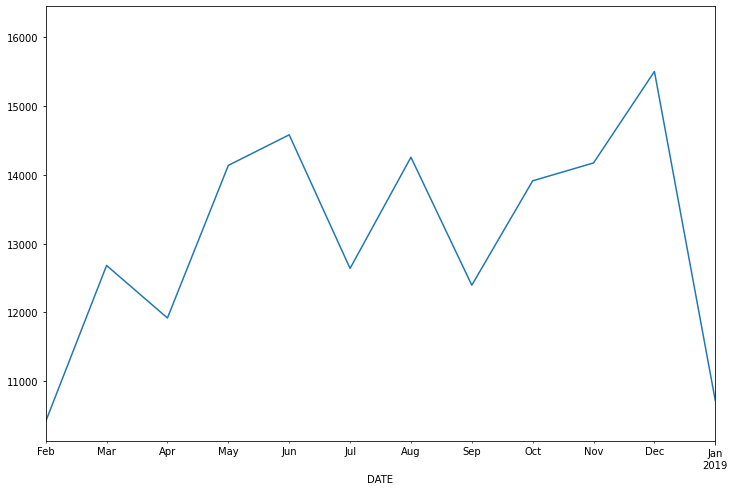

In [84]:
test['Sales'].plot(figsize=(12,8))
plt.plot(future_pred)

In [82]:
from pmdarima import auto_arima  

### Saving the model

In [85]:
model.save('my_rnn_model.h5')

# Predicting using ARIMA Models

In [156]:
#Importing Forecasting Tools
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf  # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose ## for ETS Plots
from pmdarima import auto_arima   # for determining ARIMA orders


import warnings
warnings.filterwarnings("ignore")


In [159]:
df.head()

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


### ACF Plots


Plotting the magnitude of the autocorrelations over the first few (20-40) lags can say a lot about a time series.

In [160]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

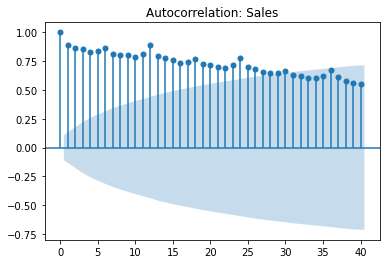

In [161]:
# let's plot the autocorrelation at different lags
title = 'Autocorrelation: Sales'
lags = 40
plot_acf(df,title=title,lags=lags);

We can observe from this plot that post 12th lag, pattern starts repeating itself indicating the yearly seasonality. 

## Run pmdarima.auto_arima to obtain recommended models

In [162]:
auto_arima(df['Sales'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  325
Model:             SARIMAX(3, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -2211.883
Date:                            Sat, 12 Dec 2020   AIC                           4443.766
Time:                                    15:11:29   BIC                           4481.196
Sample:                                         0   HQIC                          4458.726
                                            - 325                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0932      0.213     -0.437      0.662      -0.511       0.325
ar.L2          0.1006      0.086      1.163      0.245      -0.069       0.270
ar.L3          0.3211      0.069      4.666      0.000       0.186       0.456
ma.L1         -0.7379      0.221     -3.344      0.001      -1.170      -0.305
ma.L2         -0.1600      0.181     -0.884      0.377      -0.515       0.195
ar.S.L12       0.8706      0.067     13.007      0.000       0.739       1.002
ar.S.L24      -0.8277      0.058    -14.158      0.000      -0.942      -0.713
ma.S.L12      -1.1454      0.099    -11.567      0.000      -1.340      -0.951
ma.S.L24       0.6673      0.095      7.023      0.000       0.481       0.853
sigma2      8.302e+04   6787.663     12.231      0.000    6.97e+04    9.63e+04
===================================================================================
Ljung-Box (Q):                       71.64   Jarque-Bera (JB):                10.19
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               4.23   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

This provides an ARIMA Order of (3, 1, 2) combined with a seasonal order of (2, 1, 2, 12).
Now let's train & test the SARIMA(3,1,2)(2,1,2,12) model, evaluate it, then produce a forecast of future values.

## Fit a SARIMA(3,1,2)(2,1,2,12) Model

In [163]:
model2 = SARIMAX(train['Sales'],order=(3,1,2),seasonal_order=(2,1,2,12))
results = model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  313
Model:             SARIMAX(3, 1, 2)x(2, 1, 2, 12)   Log Likelihood               -2130.087
Date:                            Sat, 12 Dec 2020   AIC                           4280.175
Time:                                    15:36:19   BIC                           4317.212
Sample:                                01-01-1992   HQIC                          4294.997
                                     - 01-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2610      0.223     -1.172      0.241      -0.697       0.175
ar.L2          0.0862      0.105      0.823      0.411      -0.119       0.291
ar.L3          0.3597      0.085      4.220      0.000       0.193       0.527
ma.L1         -0.6382      0.225     -2.835      0.005      -1.079      -0.197
ma.L2         -0.2582      0.187     -1.379      0.168      -0.625       0.109
ar.S.L12       0.8397      0.125      6.728      0.000       0.595       1.084
ar.S.L24      -0.7462      0.088     -8.515      0.000      -0.918      -0.574
ma.S.L12      -1.1460      0.159     -7.214      0.000      -1.457      -0.835
ma.S.L24       0.6294      0.149      4.222      0.000       0.337       0.922
sigma2      1.019e+05   1.01e+04     10.121      0.000    8.22e+04    1.22e+05
===================================================================================
Ljung-Box (Q):                       79.16   Jarque-Bera (JB):                10.06
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               4.70   Skew:                            -0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [149]:
#Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start,end=end,dynamic=False,typ='levels').rename('SARIMA(3,1,2)(2,1,2,12)Predictions')

AttributeError: 'DecomposeResult' object has no attribute 'predict'

In [147]:
#Compare predictions to the expected values
for i in range(len(predictions)):
    print('Predicted={}, Expected={}'.format(predictions[i],test['Sales'][i]))

NameError: name 'predictions' is not defined

## Comparing our predictions with the actual values

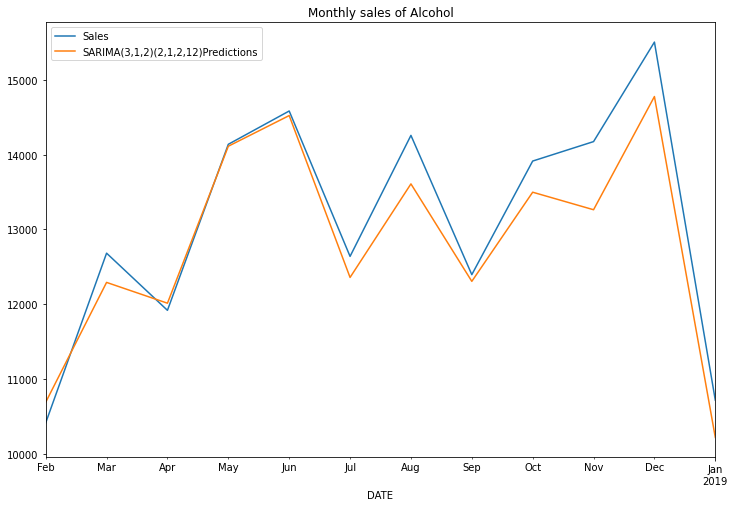

In [90]:
title = 'Monthly sales of Alcohol'

ax = test['Sales'].plot(legend=True,figsize=(12,8),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)


## Evaluation of the model

In [91]:
from sklearn.metrics import mean_squared_error

error = mean_squared_error(test['Sales'],predictions)
print(f'SARIMA(3,1,2)(2,1,2,12) MSE Error: {error}')

SARIMA(3,1,2)(2,1,2,12) MSE Error: 210733.4073951067


In [92]:
from statsmodels.tools.eval_measures import rmse

error = rmse(test['Sales'],predictions)
print(f'SARIMA(3,1,2)(2,1,2,12) RMSE Error: {error}')

SARIMA(3,1,2)(2,1,2,12) RMSE Error: 459.05708511590007


In [ ]:
MAPE2 = np.mean((abs(test['Sales']-test['Predictions'])/test['Sales'])*100)